생선 분류 문제
§ 생선 마켓에서 도미와 빙어 분류 문제
• 전통적인 프로그램
– 다양한 생선 종류 (정해진 기준대로 분류)
– 길이만으로 분류하기 어려움

In [13]:
fish_length = 40
if fish_length >= 30:
    print("도미") 

도미


• 첫 번째 머신 러닝 프로그램
– 스스로 기준을 찾고, 기준을 이용하여 생선을 분류
– 기준 설정
Ø 생선의 길이와 무게로 비교

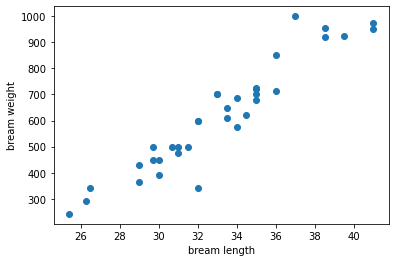

In [14]:
# 도미(bream) 데이터 활용:
# • 총 35마리의 데이터
# • 길이와 무게를 이용한 산점도(scatter plot) 그리기

bream_length =	[25.4,	26.3,	26.5,	29.0,	29.0,	29.7,	29.7,	30.0,	30.0,	30.7,	31.0,	
31.0,	31.5,	32.0,	32.0,	32.0,	33.0,	33.0,	33.5,	33.5,	34.0,	34.0,	
34.5,	35.0,	35.0,	35.0,	35.0,	36.0,	36.0,	37.0,	38.5,	38.5,	39.5,	
41.0,	41.0]
bream_weight = [242.0,	290.0,	340.0,	363.0,	430.0,	450.0,	500.0,	390.0,	450.0,	500.0,	
475.0,	500.0,	500.0,	340.0,	600.0,	600.0,	700.0,	700.0,	610.0,	650.0,
575.0,	685.0,	620.0,	680.0,	700.0,	725.0,	720.0,	714.0,	850.0,	1000.0,
920.0,	955.0,	925.0,	975.0,	950.0]

import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length') # x축은 길이
plt.ylabel('bream weight') # y축은 무게
plt.show()

빙어 데이터와 도미 데이터 비교

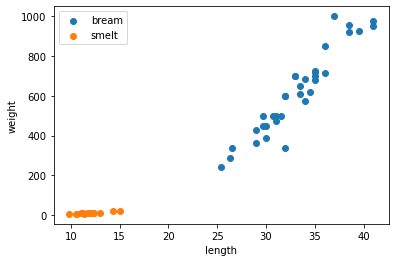

In [15]:
# 빙어(smelt) 데이터
# • 총 14마리의 빙어 데이터

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 
12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

2차원 리스트로 데이터 변형

In [16]:
# 도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 데이터 변형
# • 1차원 리스트 2개를 2차원 리스트로 변경
# • zip(length,	weight)함수를 이용
# – 길이와 무게를 하나의 쌍으로 묶음
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


정답 데이터(fish_target) 준비
• 생선의 길이와 무게를 이용하여 도미(1)와 빙어(0)를 구분
– 찾고자 하는 데이터(도미)를 1로 설정
• 원본 데이터:
– 도미 데이터: 35마리의 데이터를 1로 설정
– 빙어 데이터: 14마리의 데이터를 0으로 설정

In [17]:
fish_target =	[1]	*	35	+	[0]	*	14
print(fish_target)
# 도미(1), 방어(1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


k-최근접 알고리즘 개요
k-최근접 알고리즘(k-Nearest Neighbor, kNN)
• 가장 간단한 분류 알고리즘 (classification)
• “비슷한 특성을 가진 데이터는 비슷한 범주에 속한다”는 가정
• 주변의 가장 가까운 k개의 데이터를 보고, 데이터가 속할 그룹을 판단
• 단점
– 모든 데이터를 가지고 있어야 됨
– 많은 메모리 소모, 거리 계산에 많은 시간이 소요

k-최근접 알고리즘 적용 과정
모델 생성 -> 모델 훈련(fit) -> 모델 평가(score) -> 새로운 데이터 -> 결과 예측(predict)

In [18]:
# kNN 모델 생성
# • KNeighborClassifier(n_ngighbors,	…) 객체 생성
# • 기본 이웃의 개수: n_neighbors=5
from	sklearn.neighbors import	KNeighborsClassifier
kn =	KNeighborsClassifier()

In [19]:
# 모델 훈련(학습)
# • fit(Training	data,	Target	values)	함수
# • fish_data와 fish_target을 이용하여 모델 훈련
kn.fit(fish_data,	fish_target)

KNeighborsClassifier()

In [20]:
# 모델 평가: score() 함수
# • score(Test	samples,	Target	values): 정확도의 평균값 리턴
kn.score(fish_data,	fish_target)

1.0

In [21]:
#  새로운 데이터를 활용한 결과 예측: predict(X)
kn.predict([[30,	600]]) #	class	label 리턴(0, 1)
# predict(x) => x: 2차원 리스트 형태

array([1])